In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qutip import *

In [4]:
N = 20

wr = 2.0 * 2 * np.pi      # resonator frequency
wq = 3.0 * 2 * np.pi      # qubit frequency
chi = 0.025 * 2 * np.pi   # parameter in the dispersive hamiltonian

delta = abs(wr - wq)        # detuning
g = np.sqrt(delta * chi)  # coupling strength that is consistent with chi

In [5]:
# compare detuning and g, the first should be much larger than the second
delta/(2*np.pi), g/(2*np.pi)

(1.0, 0.15811388300841897)

In [6]:
# cavity operators
a = tensor(destroy(N), qeye(2))
nc = a.dag() * a
xc = a + a.dag()

# atomic operators
sm = tensor(qeye(N), destroy(2))
sz = tensor(qeye(N), sigmaz())
sx = tensor(qeye(N), sigmax())
nq = sm.dag() * sm
xq = sm + sm.dag()

I = tensor(qeye(N), qeye(2))

In [7]:
# dispersive hamiltonian
H = wr * (a.dag() * a + I/2.0) + (wq / 2.0) * sz + chi * (a.dag() * a + I/2) * sz

In [9]:
psi0 = tensor(coherent(N, np.sqrt(4)), (basis(2,0)+basis(2,1)).unit())
psi0

Quantum object: dims = [[20, 2], [1, 1]], shape = [40, 1], type = ket
Qobj data =
[[  9.56964965e-02]
 [  9.56964965e-02]
 [  1.91392993e-01]
 [  1.91392993e-01]
 [  2.70670566e-01]
 [  2.70670566e-01]
 [  3.12543449e-01]
 [  3.12543449e-01]
 [  3.12543449e-01]
 [  3.12543449e-01]
 [  2.79547359e-01]
 [  2.79547359e-01]
 [  2.28249463e-01]
 [  2.28249463e-01]
 [  1.72540376e-01]
 [  1.72540376e-01]
 [  1.22004470e-01]
 [  1.22004470e-01]
 [  8.13363134e-02]
 [  8.13363134e-02]
 [  5.14416004e-02]
 [  5.14416004e-02]
 [  3.10204561e-02]
 [  3.10204561e-02]
 [  1.79096534e-02]
 [  1.79096534e-02]
 [  9.93454447e-03]
 [  9.93454447e-03]
 [  5.31004475e-03]
 [  5.31004475e-03]
 [  2.74271105e-03]
 [  2.74271105e-03]
 [  1.36951636e-03]
 [  1.36951636e-03]
 [  6.69455130e-04]
 [  6.69455130e-04]
 [  3.02105194e-04]
 [  3.02105194e-04]
 [  1.71795013e-04]
 [  1.71795013e-04]]

In [10]:
tlist = np.linspace(0, 250, 1000)

In [11]:
res = mesolve(H, psi0, tlist, [], [], options=Odeoptions(nsteps=5000))

In [16]:
res

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

In [17]:
nc_list = expect(nc, res.states)
nq_list = expect(nq, res.states)

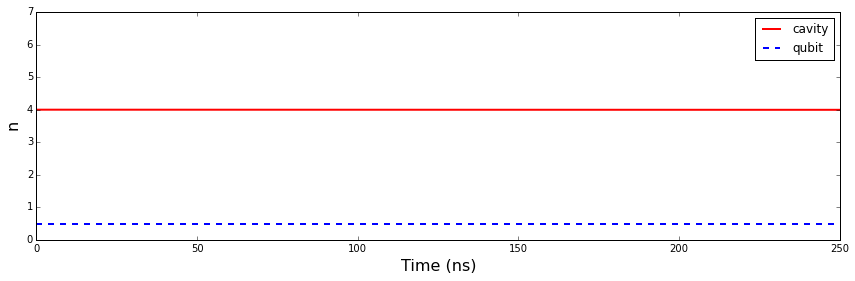

In [18]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,4))

ax.plot(tlist, nc_list, 'r', linewidth=2, label="cavity")
ax.plot(tlist, nq_list, 'b--', linewidth=2, label="qubit")
ax.set_ylim(0, 7)
ax.set_ylabel("n", fontsize=16)
ax.set_xlabel("Time (ns)", fontsize=16)
ax.legend()

fig.tight_layout()

In [19]:
tlist = np.linspace(0, 1000, 10000)
corr_vec = correlation(H, psi0, None, tlist, [], a.dag(), a)

//anaconda/lib/python3.4/site-packages/qutip/correlation.py:776: FutureWarning: correlation() now legacy, please use correlation_2op_2t()
  FutureWarning)


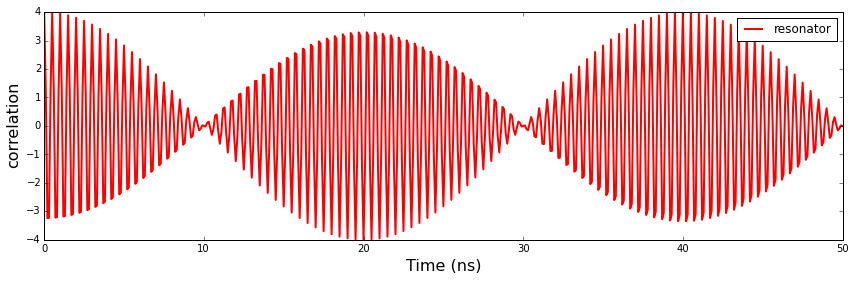

In [20]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,4))
ax.plot(tlist, np.real(corr_vec), 'r', linewidth=2, label="resonator")
ax.set_ylabel("correlation", fontsize=16)
ax.set_xlabel("Time (ns)", fontsize=16)
ax.legend()
ax.set_xlim(0,50)
fig.tight_layout()

In [21]:
w, S = spectrum_correlation_fft(tlist, corr_vec)

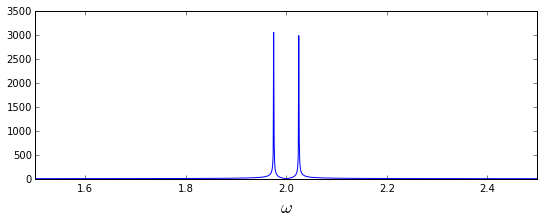

In [24]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w / (2 * np.pi), abs(S))
ax.set_xlabel(r'$\omega$', fontsize=18)
ax.set_xlim(wr/(2*np.pi)-.5, wr/(2*np.pi)+.5);

In [22]:
spectrum_ss?